# **Lab #3 : Review and Titanic Project**
---

### **Description:**
In this lab, you will hone and apply your skills through review and your first official project, particularly working with the Titanic dataset.



### **Lab Structure**

* **Part 0**: [Exploratory Data Analysis Review](#p0)

* **Part 1**: [Feature Engineering and Selection Review](#p1)

* **Part 2**: [Data Visualization Review](#p2)

* **Part 3**: [Handling Missing Data](#p3)

* **Part 4**: [Data Imputation](#p4)

* **Part 5**: [Renaming Columns](#p5)

* **Part 6**: [Mutating Column Types](#p6)

* **Part 7**: [Data Cleaning Review](#p7)

* **Part 8**: [Titanic Project](#p8)



<br>

## **Goals**
By the end of this lab, you will:
* Be comfortable using pandas to clean data.
* Understand how to engineer features to better represent characteristics of the data.
* Know how to use visualizations to study trends in the data.
* Understand what role different factors (features) played in the survival of passengers aboard the Titanic.


<br>

**Before starting, run the code below to import all necessary functions and libraries as well as today's datasets.**


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest


data = pd.read_csv("https://raw.githubusercontent.com/n-sachdeva/titanic/main/train.csv")

HTTPError: ignored

<a name="p0"></a>
## **Part 0: Exploratory Data Analysis Review**
---


### **Practice Together #1:** Run the code cell below to create and view the DataFrame.


In [5]:
# import pandas as pd
import pandas as pd

# Create a dictionary of sample data
data = {'U.S. State': ['California', 'Florida', 'Indiana', 'Texas', 'Pennsylvania'],
        'Population (in millions)': [38, 21, 6.5, 28, 13],
        'Capitol': ['Sacramento', 'Tallahassee', 'Indianapolis', 'Austin', 'Harrisburg'],
        'GDP ($ in billions)': [3700, 1070, 352, 1876, 726]}

# Create a Pandas dataframe from the dictionary
df = pd.DataFrame(data)

print(df)

     U.S. State  Population (in millions)       Capitol  GDP ($ in billions)
0    California                      38.0    Sacramento                 3700
1       Florida                      21.0   Tallahassee                 1070
2       Indiana                       6.5  Indianapolis                  352
3         Texas                      28.0        Austin                 1876
4  Pennsylvania                      13.0    Harrisburg                  726


---
#### **Try Exercises #1 - 15 on your own!**
---

### **Exercise #1:** What does `.head()` tell you about this DataFrame?

In [6]:
df.head() #it tells you the first 5 rows of the dataframe

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
0,California,38.0,Sacramento,3700
1,Florida,21.0,Tallahassee,1070
2,Indiana,6.5,Indianapolis,352
3,Texas,28.0,Austin,1876
4,Pennsylvania,13.0,Harrisburg,726


### **Exercise #2**: What is the datatype of `Population (in millions)`?

In [7]:
df['Population (in millions)'].dtype  #datatype is float64

dtype('float64')

### **Exercise #3**: What is the average `Population (in millions)` size among the U.S. states in the dataset?

In [8]:
df['Population (in millions)'].mean() #finds the average of specified column

21.3

### **Exercise #4**: Explore rows 4 and 5. What are the U.S. States listed?

In [9]:
df.iloc[3:5]  #Texas and Pennsylvania

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
3,Texas,28.0,Austin,1876
4,Pennsylvania,13.0,Harrisburg,726


### **Exercise #5**: Print all of the unique values for `GDP ($ in billions)`.

In [10]:
print(df['GDP ($ in billions)'].unique())

[3700 1070  352 1876  726]


### **Exercise #6:** What are the column names in the dataset?

In [11]:
# column names
df.dtypes # the colums are: U.S. State, Population (in millions), Capitol, GDP ($ in billions)

U.S. State                   object
Population (in millions)    float64
Capitol                      object
GDP ($ in billions)           int64
dtype: object

### **Exercise #7:** What is the total population across all states?

In [12]:
# total population
df['Population (in millions)'].sum() #106.5 million

106.5

### **Exercise #8:** Which is the highest GDP in the dataset?

In [13]:
# highest GDP
max(df['GDP ($ in billions)'])  #3700

3700

### **Exercise #9:** What is the average population of the states?

In [14]:
# average population
df['Population (in millions)'].mean()

21.3

### **Exercise #10:** What is the `Population (in millions)` for the 3rd state in the dataset?

In [15]:
# population of 3rd state
df['Population (in millions)'].iloc[2]

6.5

### **Exercise #11:** What are the states included in this dataset?

In [16]:
# list of states
print(df['U.S. State'].unique())

['California' 'Florida' 'Indiana' 'Texas' 'Pennsylvania']


### **Exercise #12:** What is the range of GDP values among the states?

In [17]:
# range of GDP values
df_max = max(df['GDP ($ in billions)'])
df_min = min(df['GDP ($ in billions)'])
df_range = df_max - df_min

print("The range of this dataset is:", df_max, "-", df_min, "=", df_range)

The range of this dataset is: 3700 - 352 = 3348


### **Exercise #13:** How many states have a population greater than 20 million?

In [18]:
# list of states with population greater than 20 million
for row in df.index:
  if(df['Population (in millions)'].iloc[row] > 20):
    print(df['U.S. State'].iloc[row])

California
Florida
Texas


### **Exercise #14:** Explore the last row in the dataset.

In [19]:
# last row
df.iloc[-1:]

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
4,Pennsylvania,13.0,Harrisburg,726


### **[Challenge Question] Exercise #15:** What is the average `GDP per capita` for the states? Divide `GDP per capita` by `Population (in millions)`.

In [20]:
# average GDP per capita
# gdp per capita is equal to the gdp of a country divided by their population (in this case we are finding the average)
df_gdp_avg = df['GDP ($ in billions)'].mean()
df_capita_avg = df['Population (in millions)'].mean()
df_gdp_per_capita = df_gdp_avg*1000000000 / df_capita_avg*1000000

print("The average GDP of the states is: ", df_gdp_avg)
print("The average population (in millions) is: ", df_capita_avg)
print("The average GDP per capita is: ", df_gdp_per_capita / 1000000000)

The average GDP of the states is:  1544.8
The average population (in millions) is:  21.3
The average GDP per capita is:  72525821.59624413


---
### Back to Lecture
---

<a name="p1"></a>

## **Part 1: Feature Engineering and Selection**
---



### **Practice Together #1:** Run the code cell below to create and view the DataFrame.

This section contains optional review problems for the topics we have learned so far. You can use these to prepare for the project below or at a later time to brush up on these topics.

In particular, this will look at a dataset containing the top 1000 movies according to the Internet Movie Database (IMDB).

In [21]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


### **Practice Together #2:** Roughly 15% of the `No_of_Votes` are online votes. Create a new column for `Online Votes`.

In [22]:
movie_df['Online Votes'] = movie_df['No_of_Votes'] * 0.15
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65


#### **Solution**

In [23]:
movie_df['Online Votes'] = movie_df['No_of_Votes'] * .15
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65


---
#### **Try Exercises #1 - 10 on your own!**
---

### **Exercise #1:** Create a new feature `Runtime (hr)`.

Create new feature called `Runtime (hr)` that converts `Runtime (min)` to hours by dividing that data by 60.

In [24]:
movie_df['Runtime (hr)'] = movie_df['Runtime (min)'] / 60  # COMPLETE THIS LINE
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes,Runtime (hr)
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50,2.366667
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05,2.916667
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80,2.533333
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80,3.366667
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60,1.916667
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25,3.350000
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10,1.966667
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65,1.616667


### **Exercise #2:** Create a new feature `Runtime (short, medium, long)`.


Create a new feature called `Runtime (short, medium, long)` that designates any movie with a runtime:
* Less than 90 minutes as 'short'.
* Between 90 and 120 minutes as 'medium'.
* Longer than 120 minutes as 'long'.

In [25]:
movie_df.loc[movie_df['Runtime (min)'] < 90, 'Runtime (short, medium, long)'] = 'short'# COMPLETE THIS LINE
movie_df.loc[movie_df['Runtime (min)'].between(90, 120), 'Runtime (short, medium, long)'] = 'medium'
movie_df.loc[movie_df['Runtime (min)'] > 120, 'Runtime (short, medium, long)'] = 'long'
# COMPLETE THIS CODE
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)"
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50,2.366667,long
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05,2.916667,long
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80,2.533333,long
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80,3.366667,long
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75,1.600000,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60,1.916667,medium
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25,3.350000,long
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10,1.966667,medium
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65,1.616667,medium


### **Exercise #3:** Create a new feature `Dollar_Per_Hour`.

Create a new feature called `Dollar_Per_Hour` that stores the result of dividing `Gross` by `Runtime (hr)`.

In [26]:
# COMPLETE THIS CODE
movie_df['Dollar_Per_Hour'] = movie_df['Gross'] / movie_df['Runtime (hr)']
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50,2.366667,long,1.197527e+07
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05,2.916667,long,4.627420e+07
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80,2.533333,long,2.111283e+08
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80,3.366667,long,1.701980e+07
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75,1.600000,medium,2.725000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60,1.916667,medium,7.193922e+05
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25,3.350000,long,4.113500e+06
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10,1.966667,medium,1.550847e+07
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65,1.616667,medium,8.523974e+06


### **Exercise #4:** Remove the `Director` column.



In [27]:
new_movie_df = movie_df.drop('Director', axis='columns')
new_movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50,2.366667,long,1.197527e+07
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05,2.916667,long,4.627420e+07
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80,2.533333,long,2.111283e+08
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80,3.366667,long,1.701980e+07
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75,1.600000,medium,2.725000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60,1.916667,medium,7.193922e+05
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25,3.350000,long,4.113500e+06
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10,1.966667,medium,1.550847e+07
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65,1.616667,medium,8.523974e+06


### **Exercise #5:** Remove the `Overview` column.



In [28]:
updated_movie_df = movie_df.drop('Overview', axis='columns')
updated_movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50,2.366667,long,1.197527e+07
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05,2.916667,long,4.627420e+07
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80,2.533333,long,2.111283e+08
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80,3.366667,long,1.701980e+07
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75,1.600000,medium,2.725000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60,1.916667,medium,7.193922e+05
1003,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25,3.350000,long,4.113500e+06
1004,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10,1.966667,medium,1.550847e+07
1005,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65,1.616667,medium,8.523974e+06


### **Exercise #6:** Create a new feature `IMDB Rating out of 100` that multiplies `IMDB_Rating` by 10.

In [29]:
movie_df['IMDB Rating out of 100'] = movie_df['IMDB_Rating'] * 10
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour,IMDB Rating out of 100
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50,2.366667,long,1.197527e+07,93.0
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05,2.916667,long,4.627420e+07,92.0
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80,2.533333,long,2.111283e+08,90.0
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80,3.366667,long,1.701980e+07,90.0
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75,1.600000,medium,2.725000e+06,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60,1.916667,medium,7.193922e+05,76.0
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25,3.350000,long,4.113500e+06,76.0
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10,1.966667,medium,1.550847e+07,76.0
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65,1.616667,medium,8.523974e+06,76.0


### **Exercise #7:** Create an encoded version of the categorical feature `Genre`.

Call the feature `Genre_Encoded`. You may find it necessary to use the pandas `unique()` function to find the unique genres to be encoded.

In [30]:
genres = {'Drama': 1, 'Crime': 2, 'Action': 3, 'Biography': 4, 'Western': 5, 'Comedy': 6,
          'Adventure': 7, 'Animation': 8, 'Horror': 9, 'Mystery': 10, 'Film-Noir': 11,
          'Fantasy' : 12, 'Family': 13, 'Thriller': 14}
#movie_df['Genre'].unique()  #Just to find how many genres needed encoding and what they were
movie_df['Genre_Encoded'] = movie_df['Genre'].map(genres)
movie_df[['Genre', 'Genre_Encoded']].head(10)

,Genre,Genre_Encoded
0,Drama,1
1,Crime,2
2,Action,3
3,Crime,2
4,Crime,2
5,Action,3
6,Crime,2
7,Biography,4
8,Action,3
9,Drama,1


### **Exercise #8:** Create a new feature `Gross Level` that divides `Gross` into 4 equal, discrete categories: `Low`, `Medium`, `High`, and `Very High`.

In [31]:
movie_df['Gross Level'] = pd.qcut(movie_df['Gross'], 4, labels=['Low', 'Medium', 'High', 'Very High'])	# COMPLETE THIS CODE
movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour,IMDB Rating out of 100,Genre_Encoded,Gross Level
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50,2.366667,long,1.197527e+07,93.0,1,High
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05,2.916667,long,4.627420e+07,92.0,2,Very High
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80,2.533333,long,2.111283e+08,90.0,3,Very High
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80,3.366667,long,1.701980e+07,90.0,2,High
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75,1.600000,medium,2.725000e+06,90.0,2,Medium


### **Exercise #9:** Select the 4 best features using `SelectKBest(...)` to predict the `IMDB_Rating`.

**Run the cell below to organize the data into numerical features and a label.**

In [32]:
features = movie_df.select_dtypes('number')
features = features.drop(columns = 'IMDB_Rating')

label = movie_df['IMDB_Rating']

In [33]:
feature_selector = SelectKBest(k = 4) # COMPLETE THIS LINE
feature_selector.fit_transform(features, label)

best_features = movie_df[feature_selector.get_feature_names_out()]

best_features.head()

,Runtime (min),No_of_Votes,Online Votes,IMDB Rating out of 100
0,142,2343110,351466.50,93.0
1,175,1620367,243055.05,92.0
2,152,2303232,345484.80,90.0
3,202,1129952,169492.80,90.0
4,96,689845,103476.75,90.0


### **Exercise #10:** Create a new feature `Age` that subtracts the `Released_Year` from the current year.

In [34]:
current_year = 2023
movie_df['Age'] = current_year - movie_df['Released_Year']
movie_df.iloc[:]

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,...,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour,IMDB Rating out of 100,Genre_Encoded,Gross Level,Age
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,2343110,28341469,351466.50,2.366667,long,1.197527e+07,93.0,1,High,29
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,1620367,134966411,243055.05,2.916667,long,4.627420e+07,92.0,2,Very High,51
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,2303232,534858444,345484.80,2.533333,long,2.111283e+08,90.0,3,Very High,15
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,1129952,57300000,169492.80,3.366667,long,1.701980e+07,90.0,2,High,49
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,689845,4360000,103476.75,1.600000,medium,2.725000e+06,90.0,2,Medium,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,...,166544,1378835,24981.60,1.916667,medium,7.193922e+05,76.0,6,Low,62
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,...,34075,13780224,5111.25,3.350000,long,4.113500e+06,76.0,1,Medium,67
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,...,43374,30500000,6506.10,1.966667,medium,1.550847e+07,76.0,1,High,70
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,...,26471,13780424,3970.65,1.616667,medium,8.523974e+06,76.0,1,Medium,79


---
### Back to Lecture
---

<a name="p2"></a>

## **Part 2: Data Visualization**
---

We will continue using the IMDB dataset used in Part 1. If you skipped Part 1, make sure to return to the section to read the DataFrame.

### **Practice Together #1:** Create a scatterplot using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Gross Money vs. Runtime:
* `X-axis`: "Gross (USD)"
* `Y-axis`: "Runtime (min)"

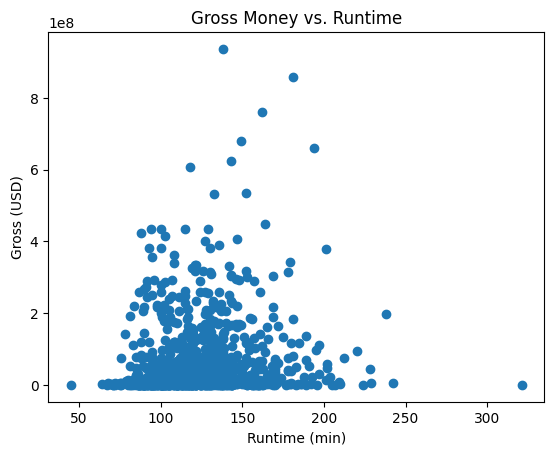

In [35]:
x_axis = movie_df['Runtime (min)']
y_axis = movie_df['Gross']

plt.scatter(x_axis, y_axis)
plt.title("Gross Money vs. Runtime")
plt.xlabel("Runtime (min)")
plt.ylabel("Gross (USD)")
plt.show()

#### **Solution**

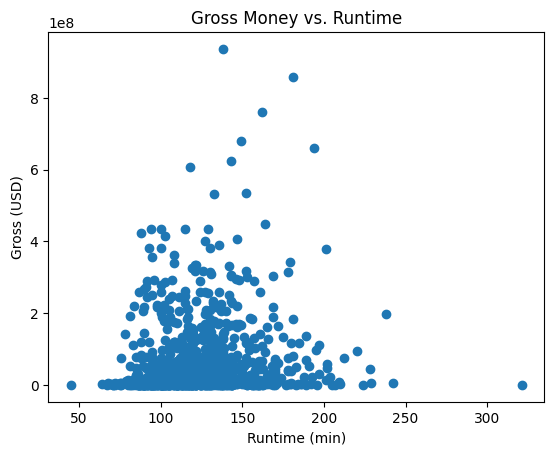

In [36]:
plt.scatter(movie_df['Runtime (min)'], movie_df['Gross'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Runtime (min)')
plt.ylabel('Gross (USD)')

plt.show()

### **Practice Together #2:** Create a scatterplot using `Released_Year` as the x-axis value and `Runtime (min)` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Runtime vs. Released_Year"
* `X-axis`: "Year"
* `Y-axis`: "Runtime (min)"

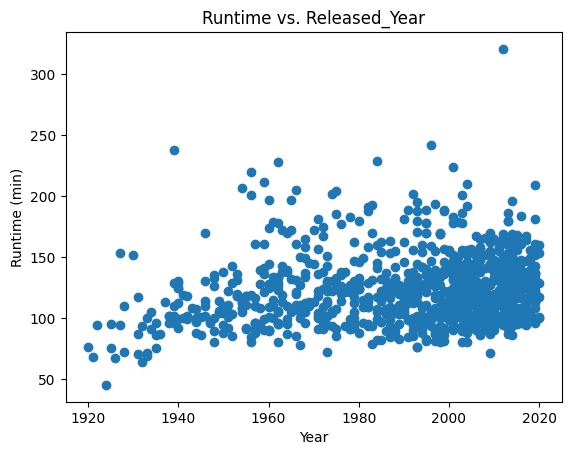

In [37]:
x_scatter = movie_df['Released_Year']
y_scatter = movie_df['Runtime (min)']

plt.scatter(x_scatter, y_scatter)
plt.title("Runtime vs. Released_Year")
plt.xlabel("Year")
plt.ylabel("Runtime (min)")
plt.show()

#### **Solution**

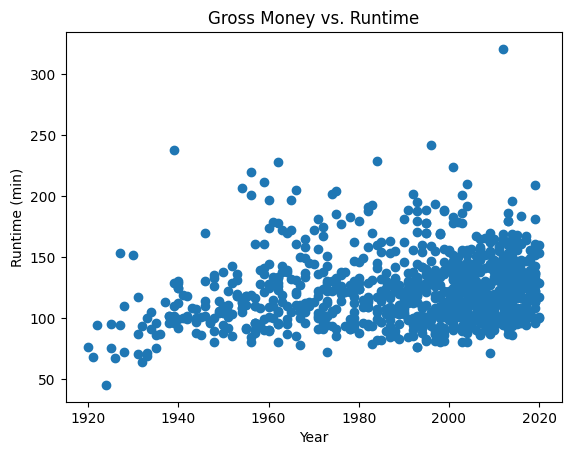

In [38]:
plt.scatter(movie_df['Released_Year'], movie_df['Runtime (min)'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Year')
plt.ylabel('Runtime (min)')

plt.show()

---
#### **Try Exercises #1 - 4 on your own!**
---

### **Exercise #1:** Create a *lineplot* using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Gross Money vs. Runtime'`.
* X-axis label including units `'min'`.
* Y-axis label including units `'USD'`.

<br>

**NOTE**: This is not going to be a particularly helpful graph (the scatter plot is a better choice), but we oftentimes will not know this ahead of time. A lot of EDA and visualizations involves trying a number of things and seeing what is useful.

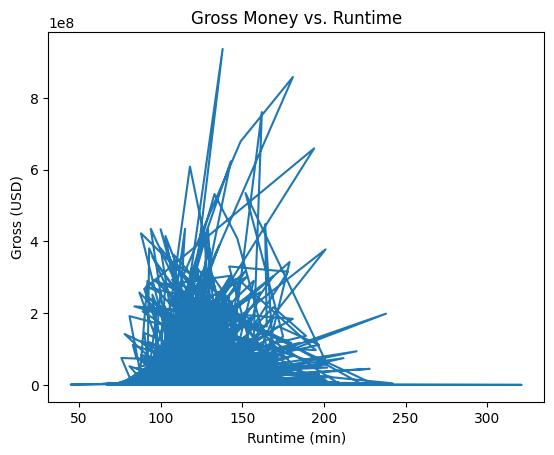

In [39]:
x_plot = movie_df['Runtime (min)']
y_plot = movie_df['Gross']

plt.plot(x_plot, y_plot)
plt.title("Gross Money vs. Runtime")
plt.xlabel("Runtime (min)")
plt.ylabel("Gross (USD)")
plt.show()

### **Exercise #2:** Create a *lineplot* using `Released_Year` as the x-axis value and `Average Gross in Year` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Average Gross Money vs. Released Year'`.
* X-axis label.
* Y-axis label including units `'USD'`.

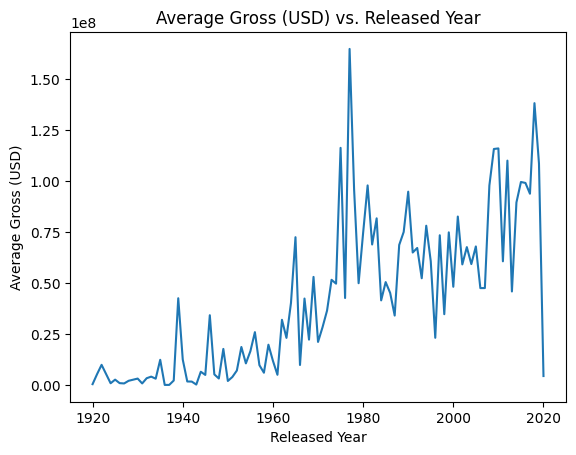

In [40]:
mean_gross = movie_df.groupby('Released_Year')  # COMPLETE THIS LINE
avg_gross = mean_gross['Gross'].mean()  # average gross of each year

plt.plot(avg_gross)
plt.title("Average Gross (USD) vs. Released Year")
plt.xlabel("Released Year")
plt.ylabel("Average Gross (USD)")
plt.show()

### **Exercise #3:** Create a bar plot of the number of movies released per year

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

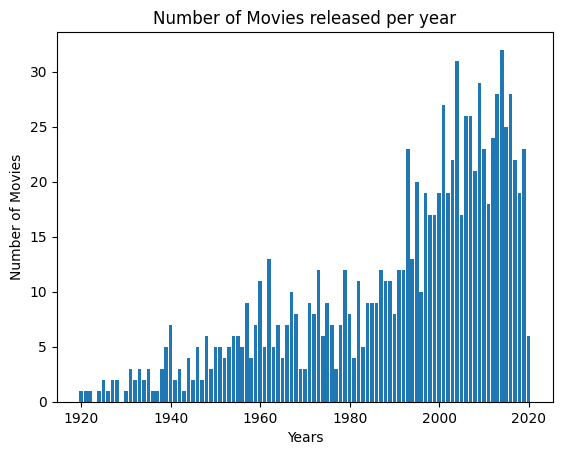

In [41]:
movies_per_year = movie_df['Released_Year'].value_counts()

plt.bar(movies_per_year.index, movies_per_year.values)  # COMPLETE THIS CODE
plt.title("Number of Movies released per year")
plt.xlabel("Years")
plt.ylabel("Number of Movies")
plt.show()

### **Exercise #4:** Create a bar plot of the number of Dramas released per year

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

<br>

**Hint**: Recall that you can use `.loc[CRITERIA, :]` to find all data matching given criteria and the example in Exercise #6 for finding the number of movies realeased per year.

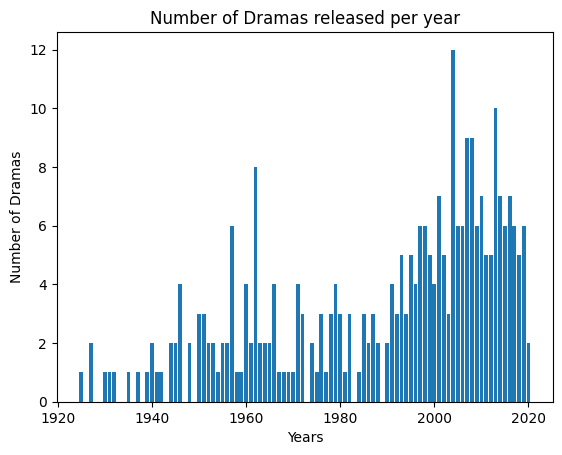

In [42]:
# COMPLETE THIS CODE
dramas_per_year = movie_df['Released_Year'].loc[(movie_df['Genre'] == 'Drama')].value_counts()

plt.bar(dramas_per_year.index, dramas_per_year.values)
plt.title("Number of Dramas released per year")
plt.xlabel("Years")
plt.ylabel("Number of Dramas")
plt.show()

---
### Back to Lecture
---

<a name="p3"></a>
## **Part 3: Handling Missing Data**
---

Use the DataFrame below on NBA basketball players to answer Exercises #1-3. Take a moment to explore the created dataframe in the cell below, which contains the names of famous NBA players, ages, heights and their respective teams.

**Remember to run the cell below to load the DataFrame before continuing onto the problems.**

### **Practice Together #1:** Run the code cell below to create and view the DataFrame.

In [43]:
#import numpy
import numpy as np
import pandas as pd

# create dataframe
df = pd.DataFrame(
  {'Name':['Giannis Antetokounmpo','Kevin Durant','Stephen Curry','Nikola Jokic', 'Joel Embiid', 'LeBron James'],
  'Age':[28, 34, 34, 27, np.nan, 38],
  'Height (in)':[83, 82, 74, 83, np.nan, 81],
  'Team':['Milwaukee Bucks', np.nan, 'Golden State Warriors', 'Denver Nuggets', np.nan, 'Los Angeles Lakers'],
   'Favorite Color':['Blue', 'Black', 'Grey', 'Green', 'Blue', 'Purple']})
df

,Name,Age,Height (in),Team,Favorite Color
0,Giannis Antetokounmpo,28.0,83.0,Milwaukee Bucks,Blue
1,Kevin Durant,34.0,82.0,NaN,Black
2,Stephen Curry,34.0,74.0,Golden State Warriors,Grey
3,Nikola Jokic,27.0,83.0,Denver Nuggets,Green
4,Joel Embiid,NaN,NaN,NaN,Blue
5,LeBron James,38.0,81.0,Los Angeles Lakers,Purple


### **Practice Together #2:** Find the non-null count to determine if there is any missing data.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            6 non-null      object 
 1   Age             5 non-null      float64
 2   Height (in)     5 non-null      float64
 3   Team            4 non-null      object 
 4   Favorite Color  6 non-null      object 
dtypes: float64(2), object(3)
memory usage: 368.0+ bytes


#### **Solution**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            6 non-null      object 
 1   Age             5 non-null      float64
 2   Height (in)     5 non-null      float64
 3   Team            4 non-null      object 
 4   Favorite Color  6 non-null      object 
dtypes: float64(2), object(3)
memory usage: 368.0+ bytes


---
#### **Try Exercises #1 - 4 on your own!**
---

### **Exercise #1:** Use `isnull()` to see which values are missing.

In [46]:
df.isnull()

,Name,Age,Height (in),Team,Favorite Color
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,True,True,False
5,False,False,False,False,False


### **Exercise #2:** Since Joel Embiid's data is missing, drop the row.

In [47]:
new_df = df.drop(index = [4])
new_df

,Name,Age,Height (in),Team,Favorite Color
0,Giannis Antetokounmpo,28.0,83.0,Milwaukee Bucks,Blue
1,Kevin Durant,34.0,82.0,NaN,Black
2,Stephen Curry,34.0,74.0,Golden State Warriors,Grey
3,Nikola Jokic,27.0,83.0,Denver Nuggets,Green
5,LeBron James,38.0,81.0,Los Angeles Lakers,Purple


### **Exercise #3:** Remove any missing values in the "Age" column.

In [48]:
df.dropna(subset=['Age'])

,Name,Age,Height (in),Team,Favorite Color
0,Giannis Antetokounmpo,28.0,83.0,Milwaukee Bucks,Blue
1,Kevin Durant,34.0,82.0,NaN,Black
2,Stephen Curry,34.0,74.0,Golden State Warriors,Grey
3,Nikola Jokic,27.0,83.0,Denver Nuggets,Green
5,LeBron James,38.0,81.0,Los Angeles Lakers,Purple


### **Exercise #4:** Remove the `Favorite Color` feature.

In [49]:
new_df = df.drop(columns = "Favorite Color")
new_df

,Name,Age,Height (in),Team
0,Giannis Antetokounmpo,28.0,83.0,Milwaukee Bucks
1,Kevin Durant,34.0,82.0,NaN
2,Stephen Curry,34.0,74.0,Golden State Warriors
3,Nikola Jokic,27.0,83.0,Denver Nuggets
4,Joel Embiid,NaN,NaN,NaN
5,LeBron James,38.0,81.0,Los Angeles Lakers


---
### Back to Lecture
---

<a name="p4"></a>
## **Part 4: Data Imputation**
---



### **Practice Together #1:** Run the code cell below to create the DataFrame.

The following students have applied for an on-campus university job as a Research Assistant. However, some data is missing. It is your job to fix the missing data.



In [50]:
# create dataframe
students_df = pd.DataFrame(
  {'name':['Jen','Akiro','Jamil','Benny', 'Aster', 'Raj', 'Alisha'],
  'age':[19, 18, 21, 23, 26, np.nan, 30],
   'gpa':[np.nan, 4.0, 3.0, 2.3, np.nan, 3.9, 3.8],
   'year':['Freshman', 'Freshman', 'Junior', 'Junior', 'Senior', 'Sophomore', 'Senior'] })
students_df

,name,age,gpa,year
0,Jen,19.0,NaN,Freshman
1,Akiro,18.0,4.0,Freshman
2,Jamil,21.0,3.0,Junior
3,Benny,23.0,2.3,Junior
4,Aster,26.0,NaN,Senior
5,Raj,NaN,3.9,Sophomore
6,Alisha,30.0,3.8,Senior


### **Practice Together #2:** Raj's age is missing. Use the mean for the non-missing values in the column `age` to replace the missing value with the mean.

In [51]:
mean_age = students_df['age'].mean()
students_df['age'] = students_df['age'].fillna(value = mean_age)
students_df.iloc[:]

,name,age,gpa,year
0,Jen,19.000000,NaN,Freshman
1,Akiro,18.000000,4.0,Freshman
2,Jamil,21.000000,3.0,Junior
3,Benny,23.000000,2.3,Junior
4,Aster,26.000000,NaN,Senior
5,Raj,22.833333,3.9,Sophomore
6,Alisha,30.000000,3.8,Senior


#### **Solution**

In [52]:
mean_age = students_df['age'].mean()

students_df['age'] = students_df['age'].fillna(value = mean_age)

students_df

,name,age,gpa,year
0,Jen,19.000000,NaN,Freshman
1,Akiro,18.000000,4.0,Freshman
2,Jamil,21.000000,3.0,Junior
3,Benny,23.000000,2.3,Junior
4,Aster,26.000000,NaN,Senior
5,Raj,22.833333,3.9,Sophomore
6,Alisha,30.000000,3.8,Senior


---
#### **Try Exercises #1 - 2 on your own!**
---

### **Exercise #1:** Jen and Aster's GPA are missing. Use the median value of `gpa` to replace these missing values.

In [53]:
median_gpa = students_df['gpa'].median()
students_df['gpa'] = students_df['gpa'].fillna(value = median_gpa)
students_df

,name,age,gpa,year
0,Jen,19.000000,3.8,Freshman
1,Akiro,18.000000,4.0,Freshman
2,Jamil,21.000000,3.0,Junior
3,Benny,23.000000,2.3,Junior
4,Aster,26.000000,3.8,Senior
5,Raj,22.833333,3.9,Sophomore
6,Alisha,30.000000,3.8,Senior


### **Exercise #2:** Replace Jen's `gpa` with the value 3.2.

In [54]:
students_df.loc[students_df['name'] == 'Jen', 'gpa'] = 3.2
students_df

,name,age,gpa,year
0,Jen,19.000000,3.2,Freshman
1,Akiro,18.000000,4.0,Freshman
2,Jamil,21.000000,3.0,Junior
3,Benny,23.000000,2.3,Junior
4,Aster,26.000000,3.8,Senior
5,Raj,22.833333,3.9,Sophomore
6,Alisha,30.000000,3.8,Senior


---
### Back to Lecture
---

<a name="p5"></a>
## **Part 5: Renaming Columns**
---

### **Practice Together #1:** Use the `students_df` DataFrame and rename `gpa` to `GPA`.

In [55]:
students_df = students_df.rename(columns={'gpa': 'GPA'})
students_df

,name,age,GPA,year
0,Jen,19.000000,3.2,Freshman
1,Akiro,18.000000,4.0,Freshman
2,Jamil,21.000000,3.0,Junior
3,Benny,23.000000,2.3,Junior
4,Aster,26.000000,3.8,Senior
5,Raj,22.833333,3.9,Sophomore
6,Alisha,30.000000,3.8,Senior


#### **Solution**

In [56]:
students_df = students_df.rename(columns={'gpa': 'GPA'})
students_df

,name,age,GPA,year
0,Jen,19.000000,3.2,Freshman
1,Akiro,18.000000,4.0,Freshman
2,Jamil,21.000000,3.0,Junior
3,Benny,23.000000,2.3,Junior
4,Aster,26.000000,3.8,Senior
5,Raj,22.833333,3.9,Sophomore
6,Alisha,30.000000,3.8,Senior


---
#### **Try Exercise #1 on your own!**
---

### **Exercise #1:** Rename the rest of columns so all column names begin with a capital letter.

In [57]:
students_df = students_df.rename(columns={'name': 'Name', 'age': 'Age', 'year': 'Year'})
students_df

,Name,Age,GPA,Year
0,Jen,19.000000,3.2,Freshman
1,Akiro,18.000000,4.0,Freshman
2,Jamil,21.000000,3.0,Junior
3,Benny,23.000000,2.3,Junior
4,Aster,26.000000,3.8,Senior
5,Raj,22.833333,3.9,Sophomore
6,Alisha,30.000000,3.8,Senior


---
### Back to Lecture
---

<a name="p6"></a>
## **Part 6: Mutating Column Types**
---

### **Practice Together #1:** Change the data type of the `age` and `gpa` columns to float.


In [58]:
students_df = students_df.astype({'Age': 'float', 'GPA': 'float'})
students_df.dtypes

Name     object
Age     float64
GPA     float64
Year     object
dtype: object

#### **Solution**

In [59]:
students_df = students_df.astype({'Age': 'float', 'GPA': 'float'})


---
#### **Try Exercise #1 on your own!**
---

### **Exercise #1:** Add a new column `major` at index position 2 with the following values: "Math", "Chemistry", "English", "Physics", "Computer Science", "Economics", "Biology".

In [60]:
majors = ['Math', "Chemistry", "English", "Physics", "Computer Science", "Economics", "Biology"]
students_df.insert(2, 'major', majors) #uncomment this line of code to see the change
students_df = students_df.rename(columns={'major': 'Major'})  #changes the name of a column
students_df

,Name,Age,Major,GPA,Year
0,Jen,19.000000,Math,3.2,Freshman
1,Akiro,18.000000,Chemistry,4.0,Freshman
2,Jamil,21.000000,English,3.0,Junior
3,Benny,23.000000,Physics,2.3,Junior
4,Aster,26.000000,Computer Science,3.8,Senior
5,Raj,22.833333,Economics,3.9,Sophomore
6,Alisha,30.000000,Biology,3.8,Senior


---
### Back to Lecture
---

<a name="p7"></a>
## **Part 7: Data Cleaning Review**
---
Review some of the data cleaning commands we have learned so far. We will continue using the IMDB dataset used in Part 1 called `movie_df`. If you skipped Part 1, make sure to return to the section to read the DataFrame.

### **Practice Together #1:** Remove duplicates using `drop_duplicates()`.

In [61]:
movie_df.drop_duplicates()  # COMPLETE THIS LINE

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,...,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour,IMDB Rating out of 100,Genre_Encoded,Gross Level,Age
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,2343110,28341469,351466.50,2.366667,long,1.197527e+07,93.0,1,High,29
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,1620367,134966411,243055.05,2.916667,long,4.627420e+07,92.0,2,Very High,51
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,2303232,534858444,345484.80,2.533333,long,2.111283e+08,90.0,3,Very High,15
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,1129952,57300000,169492.80,3.366667,long,1.701980e+07,90.0,2,High,49
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,689845,4360000,103476.75,1.600000,medium,2.725000e+06,90.0,2,Medium,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,...,166544,1378835,24981.60,1.916667,medium,7.193922e+05,76.0,6,Low,62
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,...,34075,13780224,5111.25,3.350000,long,4.113500e+06,76.0,1,Medium,67
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,...,43374,30500000,6506.10,1.966667,medium,1.550847e+07,76.0,1,High,70
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,...,26471,13780424,3970.65,1.616667,medium,8.523974e+06,76.0,1,Medium,79


### **Practice Together #2:** Drop specific columns.

Drop the following columns: `Star3` and `Star4`.

In [62]:
movie_df = movie_df.drop(['Star3', 'Star4'], axis=1)  # COMPLETE THIS LINE
movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour,IMDB Rating out of 100,Genre_Encoded,Gross Level,Age
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469,351466.50,2.366667,long,1.197527e+07,93.0,1,High,29
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411,243055.05,2.916667,long,4.627420e+07,92.0,2,Very High,51
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444,345484.80,2.533333,long,2.111283e+08,90.0,3,Very High,15
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000,169492.80,3.366667,long,1.701980e+07,90.0,2,High,49
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000,103476.75,1.600000,medium,2.725000e+06,90.0,2,Medium,66


#### **Solution**

In [64]:
#movie_df = movie_df.drop(['Star3', 'Star4'], axis=1)

---
#### **Try Exercises #1 - 3 on your own!**
---

### **Exercise #1:** Fill missing values.

Fill missing values in the `Runtime` column with the most frequent value (mean).


In [66]:
mean_runtime = movie_df['Runtime (hr)'].mean() # COMPLETE THIS LINE]
# COMPLETE THIS CODE
movie_df['Runtime (hr)'].fillna(mean_runtime, inplace = True)
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour,IMDB Rating out of 100,Genre_Encoded,Gross Level,Age
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469,351466.50,2.366667,long,1.197527e+07,93.0,1,High,29
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411,243055.05,2.916667,long,4.627420e+07,92.0,2,Very High,51
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444,345484.80,2.533333,long,2.111283e+08,90.0,3,Very High,15
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000,169492.80,3.366667,long,1.701980e+07,90.0,2,High,49
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000,103476.75,1.600000,medium,2.725000e+06,90.0,2,Medium,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,166544,1378835,24981.60,1.916667,medium,7.193922e+05,76.0,6,Low,62
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,34075,13780224,5111.25,3.350000,long,4.113500e+06,76.0,1,Medium,67
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374,30500000,6506.10,1.966667,medium,1.550847e+07,76.0,1,High,70
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471,13780424,3970.65,1.616667,medium,8.523974e+06,76.0,1,Medium,79


### **Exercise #2:** Rename the `Runtime` column to `Runtime (min)`.


In [67]:
# COMPLETE THIS CODE
movie_df = movie_df.rename(columns = {'Runtime (min)': 'Runtime'})  #changes the name of a column
movie_df = movie_df.rename(columns = {'Runtime': 'Runtime (min)'})  #changes the name of a column
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,No_of_Votes,Gross,Online Votes,Runtime (hr),"Runtime (short, medium, long)",Dollar_Per_Hour,IMDB Rating out of 100,Genre_Encoded,Gross Level,Age
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469,351466.50,2.366667,long,1.197527e+07,93.0,1,High,29
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411,243055.05,2.916667,long,4.627420e+07,92.0,2,Very High,51
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444,345484.80,2.533333,long,2.111283e+08,90.0,3,Very High,15
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000,169492.80,3.366667,long,1.701980e+07,90.0,2,High,49
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000,103476.75,1.600000,medium,2.725000e+06,90.0,2,Medium,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,166544,1378835,24981.60,1.916667,medium,7.193922e+05,76.0,6,Low,62
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,34075,13780224,5111.25,3.350000,long,4.113500e+06,76.0,1,Medium,67
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374,30500000,6506.10,1.966667,medium,1.550847e+07,76.0,1,High,70
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471,13780424,3970.65,1.616667,medium,8.523974e+06,76.0,1,Medium,79


### **Exercise #3:** Change the data type of `Runtime (min)` to `'int64'`.


In [68]:
# COMPLETE THIS CODE
movie_df = movie_df.astype({'Runtime (min)': 'int64'})
movie_df.dtypes

Series_Title                       object
Released_Year                       int64
Runtime (min)                       int64
Genre                              object
IMDB_Rating                       float64
Overview                           object
Director                           object
Star1                              object
Star2                              object
No_of_Votes                         int64
Gross                               int64
Online Votes                      float64
Runtime (hr)                      float64
Runtime (short, medium, long)      object
Dollar_Per_Hour                   float64
IMDB Rating out of 100            float64
Genre_Encoded                       int64
Gross Level                      category
Age                                 int64
dtype: object

---
### Back to Lecture
---

<a name="p8"></a>

## **Part 8: Titanic Project**
---

In the following parts, you will hone and apply your skills to a famous dataset containing information about passengers on the Titanic and whether they survived or not: [Titanic dataset from Kaggle](https://www.kaggle.com/competitions/titanic/overview).


<br>

There are twelve columns in the dataset. The target column is `Survived` which indicates if a passenger survived (1) or not (0). The features initially available are:

* `PassengerId`: Numeric, a unique number for each passenger.
* `Pclass`: Numeric, the ticket class.	1 = 1st, 2 = 2nd, 3 = 3rd.
* `Name`: Categorical, the name of the passenger.
* `Sex`: Categorical, the sex of the passenger.
* `Age`: Numeric, the passenger's age in years.
* `Sibsp`: Numeric, the number of siblings / spouses aboard the Titanic.
* `Parch`: Numeric, the number of parents / children aboard the Titanic.
* `Ticket`: Categorical, ticket number.
* `Fare`: Numeric, passenger fare.
* `Cabin`: Categorical, cabin number.
* `Embarked`: Categorical, port of embarkation.	C = Cherbourg, Q = Queenstown, S = Southampton.



To help us decide how to clean our data, we will start with some *light* EDA. Then we will drop any duplicates and unnecessary columns and fill in any values as needed.

### **Exercise #1:** Print the first 10 rows of the data.

In [69]:
import pandas as pd

titanic_df = pd.read_csv('/content/sample_data/train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### **Exercise #2:** Print a summary of the dataset.

Next, let's check if we have any missing values using the `pandas` `info()` function.

In [70]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### **General Questions To Think About**

At this point in the process, it's generally good to consider:

* Which columns contain missing values?
* Why might it not be a good idea to drop all rows with a missing value?
* For a numerical feature, what can you fill the missing values with?
* For a categorical feature, what can you fill the missing values with?
* Are there any columns will not be useful for the analysis? If so, why?


<br>

**Now that we have some basic information on our dataset, let's do some data cleaning.**

### **Exercise #3:** Remove duplicates using `drop_duplicates()`.

In [71]:
titanic_df.drop_duplicates()
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### **Exercise #4:** Drop unnecessary columns.

Drop the following columns: `PassengerId`, `Name`, `Ticket`, and `Cabin`.

In [72]:
titanic_df.drop(columns={'PassengerId', 'Name', 'Ticket', 'Cabin'})

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### **Exercise #5:** Fill missing values.

Fill missing values in the `Embarked` column with the most frequent value (mode).


In [73]:
most_frequent = titanic_df['Embarked'].mode()[0]
# COMPLETE THIS CODE
titanic_df['Embarked'].fillna(most_frequent, inplace = True)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### **Exercise #6:** Fill missing values.

Fill missing values in the `Age` column with the median value.


In [74]:
median_age = titanic_df['Age'].median()
# COMPLETE THIS CODE
titanic_df['Age'].fillna(median_age, inplace = True)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C




**Now that we have cleaned our data, we can move on to feature engineering. Specifically, we will create new relevant features and encode categorical ones.**

### **Exercise #7:** Create a new feature `AgeGroup`.
Create a new feature that designates anyone:
* Younger than 18 as `Child`.
* Between 18 and 65 as `Adult`.
* Over 65 as `Elderly`.

In [75]:
titanic_df['AgeGroup'] = ''
titanic_df.loc[(titanic_df['Age'] < 18), 'AgeGroup'] = 'Child'
titanic_df.loc[(titanic_df['Age'].between(18,65)), 'AgeGroup'] = 'Adult'
titanic_df.loc[(titanic_df['Age'] > 65), 'AgeGroup'] = 'Elderly'
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


### **Exercise #8:** Create a new feature `FareGroup`.
Using `pd.qcut()`, divide fares into four buckets: `Cheap`, `Low`, `High`, `Expensive`.



In [76]:
titanic_df['FareGroup'] = pd.qcut(titanic_df['Fare'], 4, labels=['Cheap', 'Low', 'High', 'Expensive'])  # COMPLETE THIS LINE
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Low
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult,Low
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,Expensive
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,High
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,Low
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,High


### **Exercise #9:** Create a new feature `FamilySize`.
Create a new feature by adding the columns `Sibsp` and `Parch` and including the ticket-holder themselves.


In [77]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1  #the additional one is to include the ticketholder themself
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Cheap,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Expensive,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Low,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Expensive,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Low,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult,Low,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,Expensive,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,High,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,Low,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,High,2


### **Exercise #10:** Now, we need to convert categorical variables to numerical ones. Create an encoded version of the categorical feature `Sex`. Assign "male" to`0`, and "female" to `1`.

In [78]:
# Define the mapping of labels to integers
label_map = {'male': 0, 'female': 1}  # COMPLETE THIS LINE

# Use the map() function to replace the labels with their corresponding integers
titanic_df['Sex_encoded'] = titanic_df['Sex'].map(label_map)  # COMPLETE THIS LINE
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Cheap,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Expensive,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Low,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Expensive,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Low,1,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult,Low,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,Expensive,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,High,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,Low,3,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,High,2,1


### **Exercise #11:** Create an encoded version of the categorical feature `AgeGroup`.

In [79]:
# Define the mapping of labels to integers
age_map = {'Child': 0, 'Adult': 1, 'Elderly':2} # COMPLETE THIS LINE

# Use the map() function to replace the labels with their corresponding integers
titanic_df['AgeGroup_encoded'] = titanic_df['AgeGroup'].map(age_map) # COMPLETE THIS LINE
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize,Sex_encoded,AgeGroup_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Cheap,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Expensive,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Low,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Expensive,2,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Low,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult,Low,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,Expensive,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,High,5,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,Low,3,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,High,2,1,0


### **Exercise #12:** Create an encoded version of the categorical feature `FareGroup`.

In [80]:
# COMPLETE THIS CODE
# Define the mapping of labels to integers
faregroup_map = {'Cheap': 1, 'Low': 2, 'High': 3, 'Expensive': 4} # COMPLETE THIS LINE

# Use the map() function to replace the labels with their corresponding integers
titanic_df['FareGroup_encoded'] = titanic_df['FareGroup'].map(faregroup_map) # COMPLETE THIS LINE
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize,Sex_encoded,AgeGroup_encoded,FareGroup_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Cheap,2,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Expensive,2,1,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Low,1,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Expensive,2,1,1,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Low,1,0,1,2
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult,Low,1,0,1,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,Expensive,1,0,1,4
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,High,5,0,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,Low,3,1,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,High,2,1,0,3


### **Exercise #13:** Create an encoded version of the categorical feature `Embarked`.

In [86]:
# COMPLETE THIS CODE
titanic_df['Embarked'].unique()
# Define the mapping of labels to integers
embarked_map = {'S': 1, 'C': 2, 'Q': 3} # COMPLETE THIS LINE
# Use the map() function to replace the labels with their corresponding integers
titanic_df['Embarked_encoded'] = titanic_df['Embarked'].map(embarked_map) # COMPLETE THIS LINE
titanic_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize,Sex_encoded,AgeGroup_encoded,FareGroup_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Cheap,2,0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Expensive,2,1,1,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Low,1,1,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Expensive,2,1,1,4,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Low,1,0,1,2,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult,Low,1,0,1,2,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,Expensive,1,0,1,4,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,High,5,0,0,3,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult,Low,3,1,1,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,High,2,1,0,3,2



**We will explore and visualize the data to gain insight into what factors contribute to a passenger's survival.**


**NOTE**: Because we will eventually use this data to build ML models, it is necessary to split the data into a training and validation set *before* we do EDA. Not doing so is an example of how data leakage can occur.

We can split the dataframe in `pandas` using the `sample()` function. **You do not need to remember this.**


**Run the code below to split the dataset.**

In [88]:
train = titanic_df.sample(frac = 0.8)

# Creating dataframe with the remaining 20%
validation = titanic_df.drop(train.index)

**It is vital that we only use the `train` data for the EDA below.**

### **Exercise #14:** Create a bar plot that shows passenger counts by their sex.

**Hint:** Use `value_counts()`.

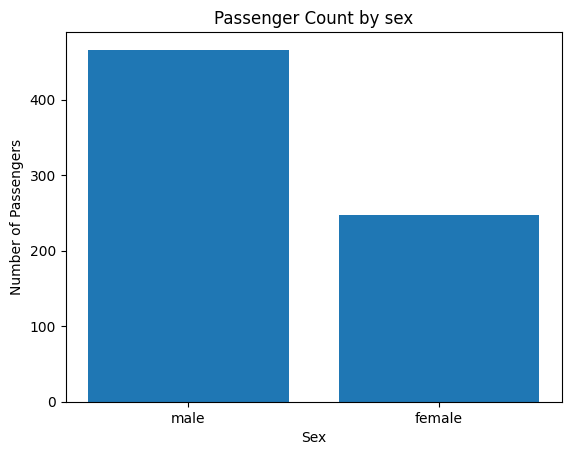

In [102]:
mf_counts = train['Sex'].value_counts() # COMPLETE THIS LINE

plt.bar(mf_counts.index, mf_counts.values)

plt.title("Passenger Count by sex")# COMPLETE THIS LINE
plt.xlabel("Sex")# COMPLETE THIS LINE
plt.ylabel("Number of Passengers")# COMPLETE THIS LINE

plt.show()

### **Exercise #15:** Use `groupby()` to get the survival rate of passengers grouped by age.

Use `AgeGroup` as the input to `groupby`, then aggregate `Survived` by mean.

In [104]:
grouped_by_age = train.groupby('AgeGroup')# COMPLETE THIS LINE
grouped_by_age['Survived'].mean()

AgeGroup
Adult      0.353323
Child      0.494382
Elderly    0.142857
Name: Survived, dtype: float64

### **Exercise #16:** Make a scatter plot of `Age` vs. `Fare`.

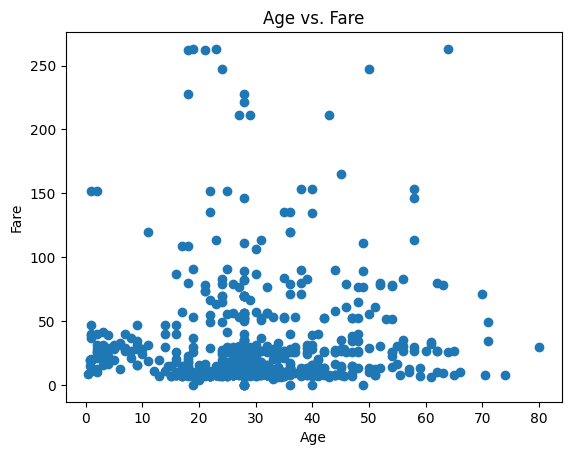

In [106]:
x_axis = train['Age']
y_axis = train['Fare']

plt.scatter(x_axis, y_axis)
plt.title("Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

**Define the `plot_survival(column)` function.**

To wrap up, you will need to answer several questions about this dataset using your work above, what you have learned about pandas and matplotlib, and a plotting function we've defined below.

<br>

This function, `plot_survival(column)` makes bar plots of survival rates and counts of any categorical variable passed in as `column`.

**Run the code below to define this plotting function.**

In [109]:
def plot_survival(column):
  survival_rate = train.groupby(column)['Survived'].mean()

  # create a bar plot for survival rate
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
  ax1.bar(x=survival_rate.index, height=survival_rate.values, color=['tab:blue'])
  ax1.set_ylabel('Survival rate')
  ax1.set_xlabel(column)

  # create a count plot for a given column
  counts = train.groupby([column, 'Survived']).size().unstack()
  width = 0.5
  x = counts.index
  survived = counts[1]
  not_survived = counts[0]
  ax2.bar(x, survived, width, label='Survived', color='tab:blue')
  ax2.bar(x, not_survived, width, bottom=survived, label='Not Survived', color='tab:orange')

  # set the labels and legend
  ax2.set_ylabel('Counts')
  ax2.set_xlabel(column)
  ax2.legend()
  plt.show()

**Below is an example of how to use the function. Run the cell below to plot survival by age group.**

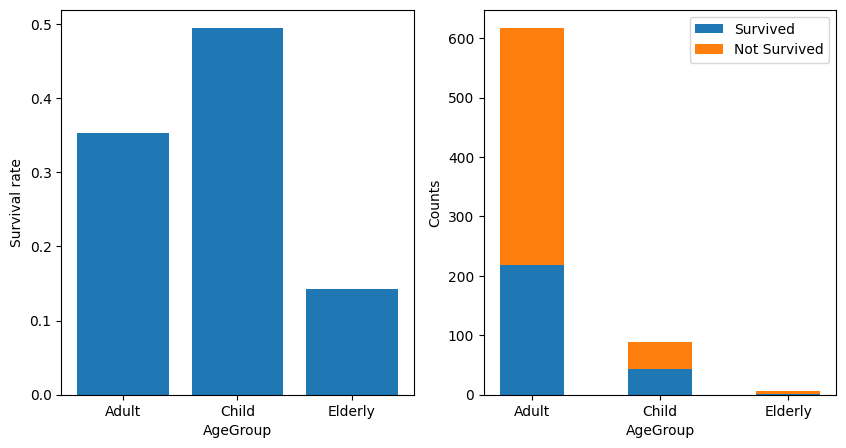

In [108]:
plot_survival('AgeGroup')

### **Exercise #17:** How many passengers survived vs. didn't survive?

**Hint**: This is a matter of *counting* how many *values* of the `Survived` column are 0 (didn't survive) vs. 1 (did survive).

In [112]:
train['Survived'].value_counts()
# 450 did not survive while 263 did survive

0    450
1    263
Name: Survived, dtype: int64

### **Exercise #18:** How did passenger class affect survival rates?

**Hint**: This is the kind of question that the `plot_survival(column)` function can help with. Furthermore, if you don't remember an exact column name off the top of your head, it can be useful to print out `train.columns` to see a list of all available columns.

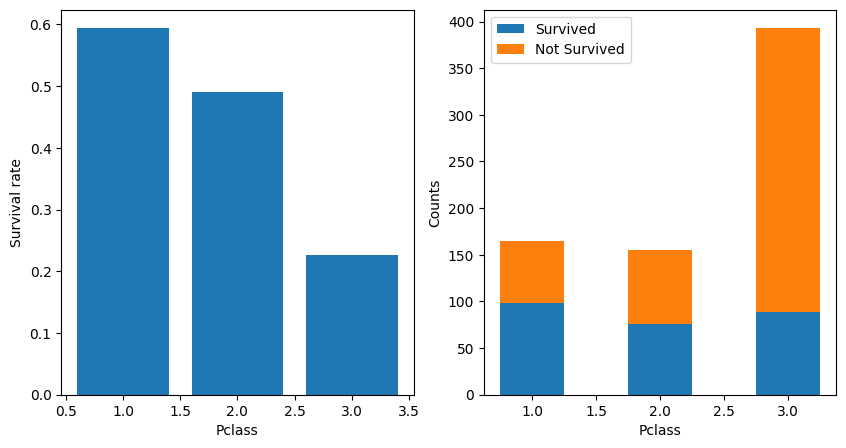

In [115]:
plot_survival('Pclass')
# it seems like the lower class had lower survival rates than the upper classes

### **Exercise #19:** How did being male or female affect survival rates?

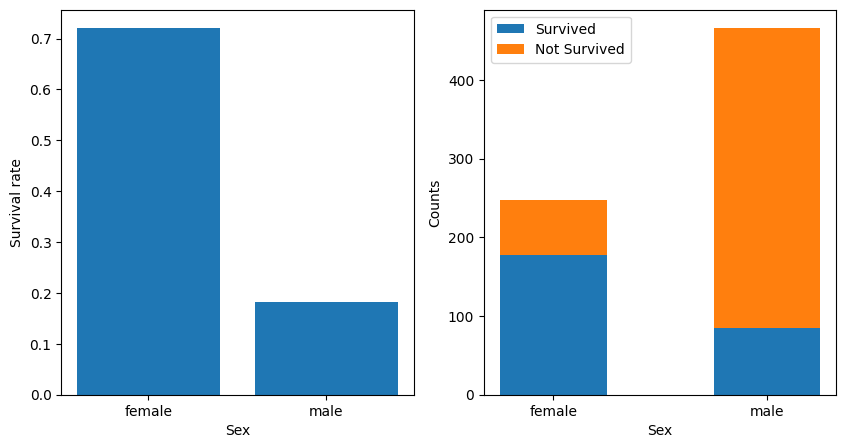

In [116]:
plot_survival('Sex')
# females seemed to have the higher survival rates

### **Exercise #20:** How did having family members onboard affect survival rates?

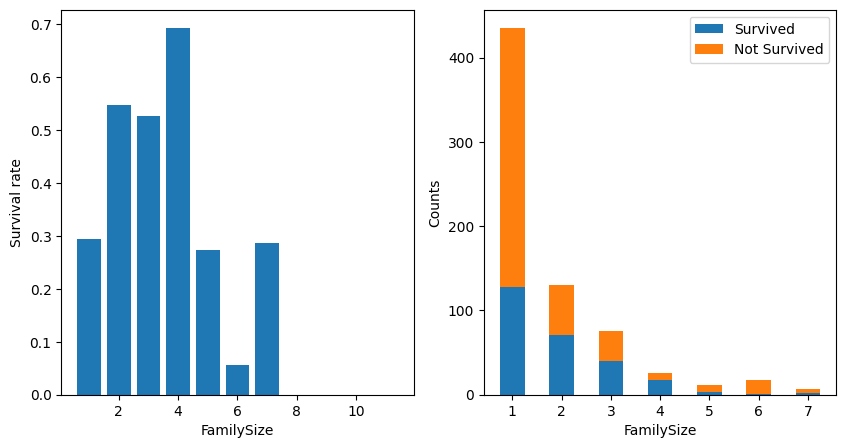

In [118]:
plot_survival('FamilySize')
# it seems like middle-sized families (not too large or too small, specifically sizes of 2-4) had better survival rates than the smallest and largest families

### **Exercise #21:** How did age group affect survival rates?

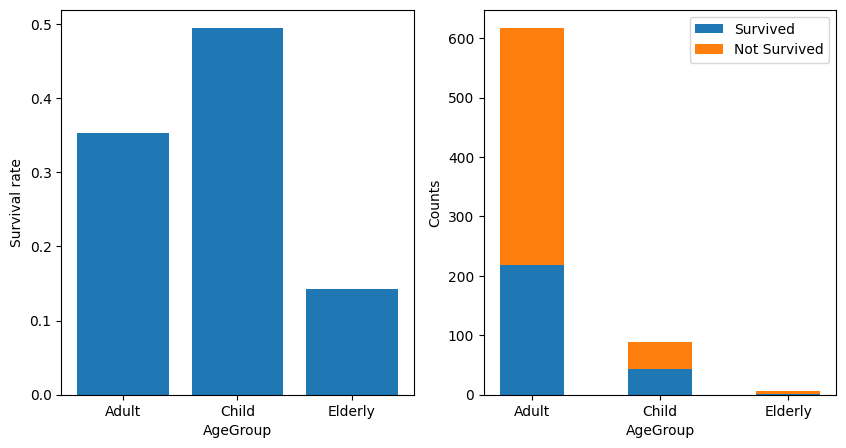

In [119]:
train.columns
plot_survival('AgeGroup')
# it seems like the younger the passenger was, the more likely they were to survive

### **Exercise #22:** How did fare group affect survival rates?

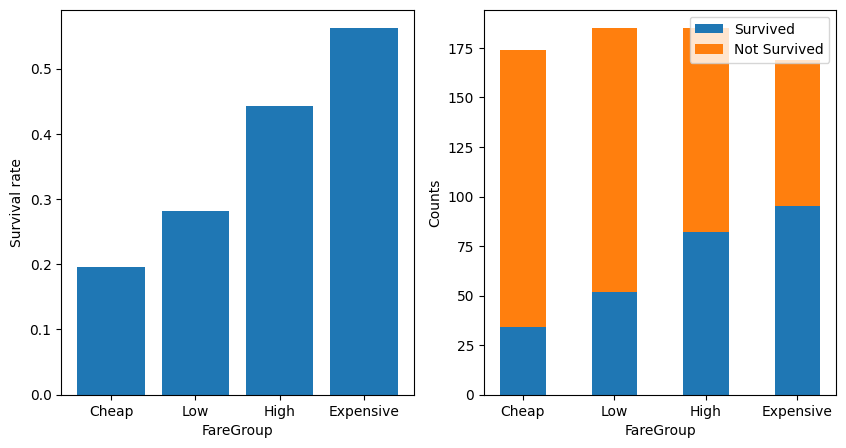

In [120]:
plot_survival('FareGroup')
# those who had more expensive fares seemed to have a higher survival rate than those who had cheaper fares

### **Exercise #23:** How did the port of embarkation affect survival rates?

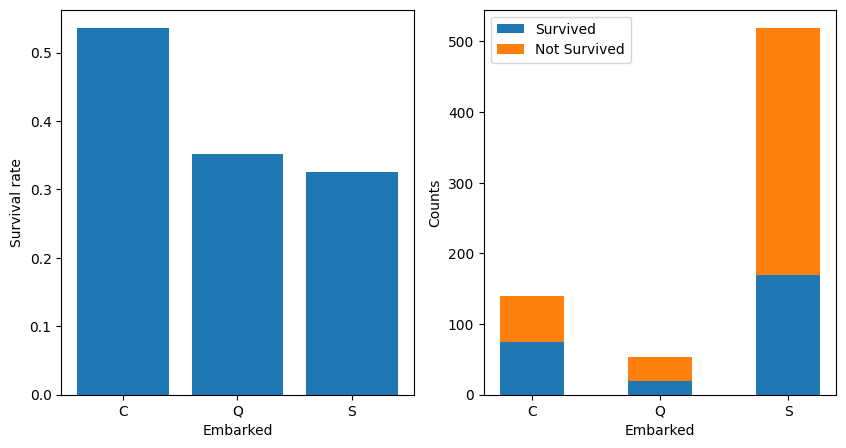

In [121]:
plot_survival('Embarked')
# those who embarked from Cherbourg had the highest survival rate

### **Exercise #24:** What 3 features would be most useful for predicting survival?

**Hint**: `SelectKBest(...)` would be helpful here.

**Run the code below to organize the data into numerical features and the label.**

In [123]:
features = train.select_dtypes('number')
features = features.drop('Survived', axis = 1)

label = train['Survived']

In [125]:
feature_selector = SelectKBest(k = 3)
feature_selector.fit_transform(features, label)

best_features = train[feature_selector.get_feature_names_out()]

best_features.head()

,Pclass,Fare,Sex_encoded
250,3,7.25,0
322,2,12.35,1
81,3,9.50,0
630,1,30.00,0
855,3,9.35,1


## **Wrapping Up**

Congratulations on completing a data science project! Not all data science projects include machine learning. Drawing insights from data through EDA, feature engineering, and visualizations is data science! In a later lab, you will continue your project with machine learning to make survival predictions for individual passengers.


---
© 2023 The Coding School, All rights reserved